In [1]:
from utils_function import *
import pandas as pd
import numpy as np
import gc

# Implementation of ENB 

In [2]:
nb = MultinomialNaiveBayes()

In [3]:
train_path = '../../Data/train.csv'
PATH = train_path 
df  = pd.read_csv(PATH,encoding='utf-8',header=None)
Xss_train = df[0]
Ys_train = df[2]
print(Xss_train.shape)
print(Ys_train.shape)
df.head()

(66927,)
(66927,)


,0,1,2
0,Hola. hi. whats up? not a ton. you? same. bei...,03:20,0
1,asuu lonte koe hi,14:36,0
2,hi asl m or f m,02:55,0
3,happy is ayuppie word. a yuppie * yuppie hehe....,12:37,0
4,ask me 5 questions and i will answer them trut...,02:45,0


In [4]:
test_path = '../../Data/test.csv'
PATH = test_path 
df  = pd.read_csv(PATH,encoding='utf-8',header=None)
Xss_test = df[0]
Xss_test_original = Xss_test
Ys_test = df[2]
Ys_test_orignal = Ys_test
print(Xss_test.shape)
print(Ys_test.shape)
df.head()

(155128,)
(155128,)


,0,1,2
0,bugmail: [Bug 6978] New: Mark eof-terminated s...,15:24,0
1,back ok babe what happend babe dog wanted out ...,19:28,1
2,hello boys are shit that they are hi sorry i w...,03:10,0
3,hi hii hous it going? w r u from ?,10:36,0
4,"hello there how are ya? hey so, where are you ...",14:11,0


In [5]:
Ys_train = np.asarray(Ys_train)
Ys_test = np.asarray(Ys_test)
posis_train = np.argwhere(Ys_train==1)
posis_test  = np.argwhere(Ys_test==1)
negas_train = np.argwhere(Ys_train==0)
negas_test  = np.argwhere(Ys_test==0)
print("Groomers: ",len(posis_train)," Non-groomers: ", len(negas_train))
print("Groomers: ",len(posis_test)," Non-groomers: ", len(negas_test))

Groomers:  2016  Non-groomers:  64911
Groomers:  3737  Non-groomers:  151391


# Applying steamming to the documents

In [6]:
"""
documents_train = steamming_documents(Xss_train)
documents_test = steamming_documents(Xss_test)
saving_pkl(documents_train,"Data/documents_train_NB")
saving_pkl(documents_test,"Data/documents_test_NB")
"""
print("Compile if it is the frst time ...")

Compile if it is the frst time ...


In [7]:
documents_train = loading_pkl("Data/documents_train_NB")
documents_test = loading_pkl("Data/documents_test_NB")
Xss_train = documents_train
Xss_test = documents_test

# Removing SW

In [8]:
'''
Xss_train = removing_sw(Xss_train)
Xss_test = removing_sw(Xss_test)
Xss_train[4]
'''
print("Removing SW ")

Removing SW 


# N-grams

In [9]:
'''
Xss_train = n_grams(Xss_train)
Xss_test = n_grams(Xss_test)
Xss_train[4]
saving_pkl(Xss_train,"Data/documents_train_final")
saving_pkl(Xss_test,"Data/documents_test_final")
'''
print("Final ..")

Final ..


In [10]:
Xss_train = loading_pkl("Data/documents_train_final")
Xss_test = loading_pkl("Data/documents_test_final")

In [11]:
g_test = sum([1 for i in Ys_test if i ==1])
print("Num groomer Before: ",g_test)

Num groomer Before:  3737


In [12]:
X_train,Ys_train = pre_processing_conversations(Xss_train,Ys_train)
X_test,Ys_test = pre_processing_conversations(Xss_test,Ys_test)

In [13]:
g_test = sum([1 for i in Ys_test if i ==1])
print("Num groomer After: ",g_test)

Num groomer After:  3367


In [14]:
vectorizer = TfidfVectorizer(min_df = 10)
X = vectorizer.fit_transform(X_train)
X_train = X.toarray()
DicC = vectorizer.get_feature_names()
len(DicC)

11335

In [16]:
vectorizer = TfidfVectorizer(vocabulary=DicC) 
X = vectorizer.fit_transform(X_test)
print(X.shape)
X_test = X.toarray()
print(X_train.shape,X_test.shape)

(150903, 11335)
(65045, 11335) (150903, 11335)


In [17]:
Y_train = np.asarray(Ys_train)
Y_test  = np.asarray(Ys_test)

In [18]:
params = nb.train(X_train, Y_train)
predict_test = nb.test(X_test, params)

In [19]:
f1_g = np.round(f1_score(Y_test,predict_test,average='binary',pos_label=1),4)
print("The F1 mesure with the 100% of the information is: ",f1_g)
g_test = 3724 # Number of empty groomers before pre-preocessing, Original SGD testing have 3737 groomers, however 3724 are not empty
print(error_filtering(g_test,Y_test,predict_test))

The F1 mesure with the 100% of the information is:  0.3412
Filter groomers:  357
0.317


# Also testing with NB from package sklearn

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
NB = MultinomialNB()
NB_model = NB.fit(X_train, Y_train)
NB_predictions = NB_model.predict(X_test)
f1_g = np.round(f1_score(Y_test,NB_predictions,average='binary',pos_label=1),4)
print("The F1 mesure with the 100% of the information is: ",f1_g)
confusion_matrix(Y_test, NB_predictions)

The F1 mesure with the 100% of the information is:  0.3412


array([[147028,    508],
       [  2570,    797]])

# Testing with partial information

In [21]:
retains = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
#simulated_docs = get_percentage_document(Xss_test_original,retains)
#saving_pkl(simulated_docs,"Savings/simulated_docs")
simulated_docs = loading_pkl("dataSavings/simulated_docs")

In [22]:
def simulation_NB(labels):
    j = 0
    mnb = list()
    for sd in (simulated_docs):
        # Each sd contains  the x% of every document 
        print("---------------------------------------- ",retains[j]*100," ---------------------------------------------")

        
        sd_steammed = steamming_documents(sd)
        
        sd_steammed = removing_sw(sd_steammed)
        
        sd_ngrams = n_grams(sd_steammed)

        # Processing the set of documents
        #doc_partial,Y_partial = removing_empty(sd_steammed,labels)
        doc_partial,Y_partial = pre_processing_conversations(sd_ngrams,labels)
        Y_partial = np.asarray(Y_partial)

        # Transforming the documents to a matrix
        vectorizer = TfidfVectorizer(vocabulary=DicC) 
        X = vectorizer.fit_transform(doc_partial)
        X_partial = X.toarray()
        print(X_partial.shape)
        

        # Performing predictions with NB
        predict_test = nb.test(X_partial, params)
        f1 = np.round(f1_score(Y_partial,predict_test,average='binary',pos_label=1),4)
        f1_error = error_filtering(g_test,Y_partial,predict_test)
        print("Our NB: ",f1," ",f1_error)
        mnb.append(f1_error)
        
        NB_predictions = NB_model.predict(X_partial)
        f1_g = np.round(f1_score(Y_partial,NB_predictions,average='binary',pos_label=1),4)
        NB_error =error_filtering(3724,Y_partial,NB_predictions)
        print("Sklearn NB: ",f1_g," ",NB_error)

        # Free memory
        del vectorizer
        gc.collect()
        j += 1
    return mnb

In [23]:
mnb_f1 = simulation_NB(Ys_test_orignal)

  0%|          | 0/155128 [00:00<?, ?it/s]

----------------------------------------  10.0  ---------------------------------------------


100%|██████████| 155128/155128 [01:43<00:00, 1504.42it/s]


(84691, 11335)
Filter groomers:  1280
Our NB:  0.0785   0.0545
Filter groomers:  1280
Sklearn NB:  0.0785   0.0545


  0%|          | 153/155128 [00:00<01:41, 1525.63it/s]

----------------------------------------  20.0  ---------------------------------------------


100%|██████████| 155128/155128 [02:01<00:00, 1281.22it/s]


(108225, 11335)
Filter groomers:  930
Our NB:  0.1515   0.1189
Filter groomers:  930
Sklearn NB:  0.1515   0.1189
---------------------------------------- 

  0%|          | 107/155128 [00:00<02:38, 979.04it/s]

 30.0  ---------------------------------------------


100%|██████████| 155128/155128 [02:18<00:00, 1117.78it/s]


(124701, 11335)
Filter groomers:  721
Our NB:  0.1851   0.1548
Filter groomers:  721
Sklearn NB:  0.1851   0.1548


  0%|          | 72/155128 [00:00<03:37, 712.19it/s]

----------------------------------------  40.0  ---------------------------------------------


100%|██████████| 155128/155128 [02:35<00:00, 995.63it/s] 


(133266, 11335)
Filter groomers:  633
Our NB:  0.2077   0.1782
Filter groomers:  633
Sklearn NB:  0.2077   0.1782


  0%|          | 68/155128 [00:00<04:28, 576.56it/s]

----------------------------------------  50.0  ---------------------------------------------


100%|██████████| 155128/155128 [03:49<00:00, 676.79it/s] 


(139322, 11335)
Filter groomers:  555
Our NB:  0.2305   0.2024
Filter groomers:  555
Sklearn NB:  0.2305   0.2024


  0%|          | 59/155128 [00:00<04:55, 525.49it/s]

----------------------------------------  60.0  ---------------------------------------------


100%|██████████| 155128/155128 [06:19<00:00, 409.21it/s] 


(143792, 11335)
Filter groomers:  491
Our NB:  0.2534   0.2266
Filter groomers:  491
Sklearn NB:  0.2534   0.2266


  0%|          | 37/155128 [00:00<07:10, 360.36it/s]

----------------------------------------  70.0  ---------------------------------------------


100%|██████████| 155128/155128 [07:53<00:00, 327.63it/s]  


(147030, 11335)
Filter groomers:  444
Our NB:  0.2659   0.2408
Filter groomers:  444
Sklearn NB:  0.2659   0.2408


  0%|          | 39/155128 [00:00<06:50, 378.10it/s]

----------------------------------------  80.0  ---------------------------------------------


100%|██████████| 155128/155128 [09:08<00:00, 282.74it/s] 


(148294, 11335)
Filter groomers:  399
Our NB:  0.2795   0.2561
Filter groomers:  399
Sklearn NB:  0.2795   0.2561


  0%|          | 36/155128 [00:00<07:21, 351.49it/s]

----------------------------------------  90.0  ---------------------------------------------


100%|██████████| 155128/155128 [10:19<00:00, 250.39it/s] 


(149663, 11335)
Filter groomers:  365
Our NB:  0.2923   0.2703
Filter groomers:  365
Sklearn NB:  0.2923   0.2703


  0%|          | 30/155128 [00:00<09:14, 279.67it/s]

----------------------------------------  100  ---------------------------------------------


100%|██████████| 155128/155128 [12:27<00:00, 207.43it/s]  


(150894, 11335)
Filter groomers:  357
Our NB:  0.3412   0.317
Filter groomers:  357
Sklearn NB:  0.3412   0.317


# Testing with SGD testing corpus

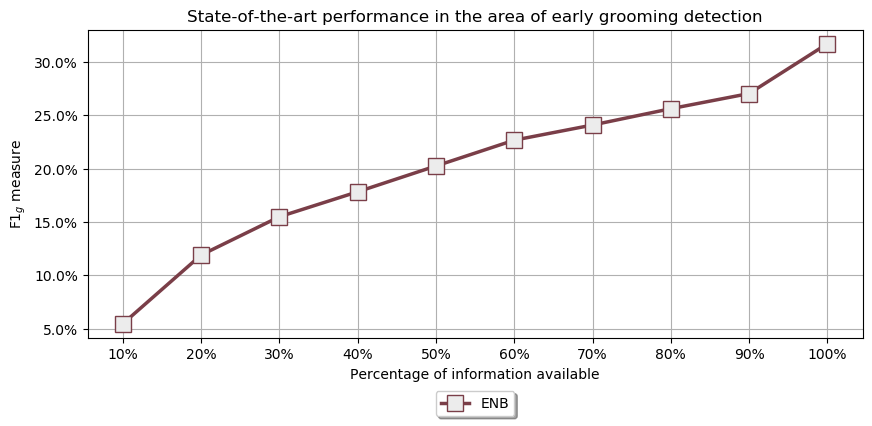

In [29]:
results = mnb_f1.copy()
plotting(results,"#7a3e48","s","ENB") 

In [25]:
mnb_f1

[0.0545, 0.1189, 0.1548, 0.1782, 0.2024, 0.2266, 0.2408, 0.2561, 0.2703, 0.317]

In [31]:
def calculating_preds(PATH,num_chunks):

    print("Extracting conversations")
    data_set = loading_pkl(PATH) 
    matrix_text,labels,start_time_conversations,number_participants,matrix = data_set    
    groomers = sum([1 for i in labels if i==1])
    print("Num of groomers ... ",groomers)
    print("%text: ",(matrix_text.shape))
    print("labels: ",len(labels),labels[0])
    print("start_time_conversations: ",len(start_time_conversations),start_time_conversations[0])
    print("# participants: ",(number_participants.shape),number_participants[0][0])
    print("%int matrix: ",(matrix.shape),matrix[0][0])
    print("+"*40)
    
    mnb = list()
    for  chunk in range(num_chunks):
        doc_partial = matrix_text[:,chunk]
        Y_partial = labels
        
        sd_steammed = steamming_documents(doc_partial)
        
        sd_steammed = removing_sw(sd_steammed)
        
        sd_ngrams = n_grams(sd_steammed)

        # Processing the set of documents
        doc_partial,Y_partial = pre_processing_conversations(sd_ngrams,Y_partial)
        Y_partial = np.asarray(Y_partial)

        # Transforming the documents to a matrix
        vectorizer = TfidfVectorizer(vocabulary=DicC) 
        X = vectorizer.fit_transform(doc_partial)
        X_partial = X.toarray()
        print(X_partial.shape)
        

        # Performing predictions with NB
        predict_test = nb.test(X_partial, params)
        f1 = np.round(f1_score(Y_partial,predict_test,average='binary',pos_label=1),4)
        f1_error = error_filtering(1104,Y_partial,predict_test)
        print("Our NB: ",f1," ",f1_error)
        mnb.append(f1_error)
        
        NB_predictions = NB_model.predict(X_partial)
        f1_g = np.round(f1_score(Y_partial,NB_predictions,average='binary',pos_label=1),4)
        NB_error =error_filtering(1104,Y_partial,NB_predictions)
        print("Sklearn NB: ",f1_g," ",NB_error)

        # Free memory
        del vectorizer
        gc.collect()
    
    print(mnb)
    results = mnb.copy()
    plotting(results,"#7a3e48","s","ENB") 
    return mnb

# Testing with PJZC dataset

Extracting conversations


  1%|          | 118/21070 [00:00<00:17, 1176.72it/s]

Num of groomers ...  1104
%text:  (21070, 10)
labels:  21070 0
start_time_conversations:  21070 18:10
# participants:  (21070, 10) [1]
%int matrix:  (21070, 10) [1. 0. 0. 0. 0.]
++++++++++++++++++++++++++++++++++++++++


100%|██████████| 21070/21070 [00:06<00:00, 3079.73it/s]


(20431, 11335)
Filter groomers:  126
Our NB:  0.0339   0.0301


  0%|          | 0/21070 [00:00<?, ?it/s]

Filter groomers:  126
Sklearn NB:  0.0339   0.0301


100%|██████████| 21070/21070 [00:10<00:00, 2092.21it/s]


(20518, 11335)
Filter groomers:  112
Our NB:  0.0526   0.0475


  0%|          | 0/21070 [00:00<?, ?it/s]

Filter groomers:  112
Sklearn NB:  0.0526   0.0475


100%|██████████| 21070/21070 [00:13<00:00, 1597.08it/s]


(20564, 11335)
Filter groomers:  101
Our NB:  0.0817   0.0746


  0%|          | 0/21070 [00:00<?, ?it/s]

Filter groomers:  101
Sklearn NB:  0.0817   0.0746


100%|██████████| 21070/21070 [00:16<00:00, 1295.60it/s]


(20601, 11335)
Filter groomers:  94
Our NB:  0.1007   0.0926


  0%|          | 0/21070 [00:00<?, ?it/s]

Filter groomers:  94
Sklearn NB:  0.1007   0.0926


100%|██████████| 21070/21070 [00:19<00:00, 1091.43it/s]


(20612, 11335)
Filter groomers:  91
Our NB:  0.1005   0.0926


  0%|          | 0/21070 [00:00<?, ?it/s]

Filter groomers:  91
Sklearn NB:  0.1005   0.0926


100%|██████████| 21070/21070 [00:22<00:00, 938.41it/s] 


(20652, 11335)
Filter groomers:  82
Our NB:  0.1082   0.1006


  0%|          | 0/21070 [00:00<?, ?it/s]

Filter groomers:  82
Sklearn NB:  0.1082   0.1006


100%|██████████| 21070/21070 [00:25<00:00, 833.45it/s]


(20661, 11335)
Filter groomers:  82
Our NB:  0.1252   0.1166


  0%|          | 0/21070 [00:00<?, ?it/s]

Filter groomers:  82
Sklearn NB:  0.1252   0.1166


100%|██████████| 21070/21070 [00:28<00:00, 742.31it/s]


(20665, 11335)
Filter groomers:  82
Our NB:  0.1285   0.1196


  0%|          | 0/21070 [00:00<?, ?it/s]

Filter groomers:  82
Sklearn NB:  0.1285   0.1196


100%|██████████| 21070/21070 [00:31<00:00, 670.89it/s]


(20676, 11335)
Filter groomers:  82
Our NB:  0.1355   0.1262


  0%|          | 0/21070 [00:00<?, ?it/s]

Filter groomers:  82
Sklearn NB:  0.1355   0.1262


100%|██████████| 21070/21070 [00:33<00:00, 624.02it/s]


(20676, 11335)
Filter groomers:  82
Our NB:  0.1504   0.1401
Filter groomers:  82
Sklearn NB:  0.1504   0.1401
[0.0301, 0.0475, 0.0746, 0.0926, 0.0926, 0.1006, 0.1166, 0.1196, 0.1262, 0.1401]


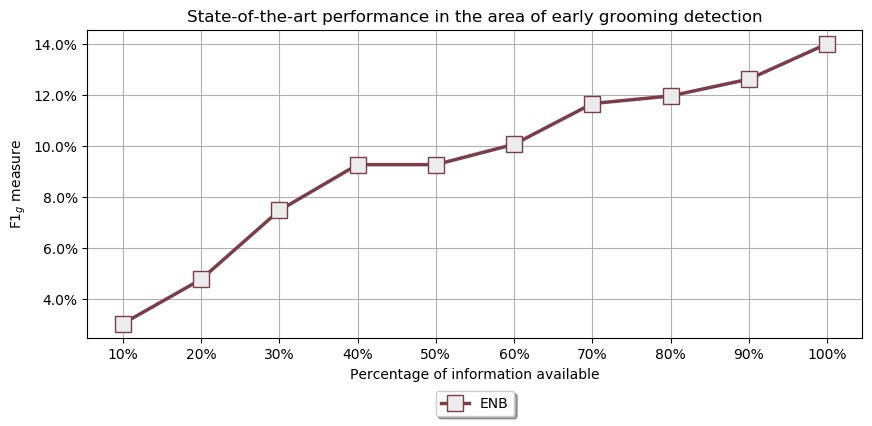

In [32]:
PATH = "../../Data/PJZC.pkl"
mnb = calculating_preds(PATH,10)

# Testing with PJZ dataset

Extracting conversations


  1%|          | 115/13822 [00:00<00:12, 1138.08it/s]

Num of groomers ...  1104
%text:  (13822, 10)
labels:  13822 0
start_time_conversations:  13822 05:16
# participants:  (13822, 10) [2]
%int matrix:  (13822, 10) [0.625 0.375 0.    0.    0.   ]
++++++++++++++++++++++++++++++++++++++++


100%|██████████| 13822/13822 [00:04<00:00, 3233.34it/s]


(13580, 11335)
Filter groomers:  126
Our NB:  0.0359   0.0319


  0%|          | 0/13822 [00:00<?, ?it/s]

Filter groomers:  126
Sklearn NB:  0.0359   0.0319


100%|██████████| 13822/13822 [00:06<00:00, 2256.12it/s]


(13613, 11335)
Filter groomers:  112
Our NB:  0.0564   0.0509


  0%|          | 0/13822 [00:00<?, ?it/s]

Filter groomers:  112
Sklearn NB:  0.0564   0.0509


100%|██████████| 13822/13822 [00:08<00:00, 1725.03it/s]


(13634, 11335)
Filter groomers:  101
Our NB:  0.0855   0.078


  0%|          | 0/13822 [00:00<?, ?it/s]

Filter groomers:  101
Sklearn NB:  0.0855   0.078


100%|██████████| 13822/13822 [00:09<00:00, 1417.31it/s]


(13646, 11335)
Filter groomers:  94
Our NB:  0.1063   0.0978


  0%|          | 0/13822 [00:00<?, ?it/s]

Filter groomers:  94
Sklearn NB:  0.1063   0.0978


100%|██████████| 13822/13822 [00:11<00:00, 1188.11it/s]


(13652, 11335)
Filter groomers:  91
Our NB:  0.1007   0.0928


  0%|          | 0/13822 [00:00<?, ?it/s]

Filter groomers:  91
Sklearn NB:  0.1007   0.0928


100%|██████████| 13822/13822 [00:13<00:00, 1031.27it/s]


(13665, 11335)
Filter groomers:  82
Our NB:  0.1085   0.1009


  0%|          | 0/13822 [00:00<?, ?it/s]

Filter groomers:  82
Sklearn NB:  0.1085   0.1009


100%|██████████| 13822/13822 [00:15<00:00, 905.48it/s]


(13665, 11335)
Filter groomers:  82
Our NB:  0.1291   0.1201


  0%|          | 0/13822 [00:00<?, ?it/s]

Filter groomers:  82
Sklearn NB:  0.1291   0.1201


100%|██████████| 13822/13822 [00:16<00:00, 820.51it/s]


(13665, 11335)
Filter groomers:  82
Our NB:  0.1342   0.1249


  0%|          | 0/13822 [00:00<?, ?it/s]

Filter groomers:  82
Sklearn NB:  0.1342   0.1249


100%|██████████| 13822/13822 [00:18<00:00, 729.56it/s]


(13665, 11335)
Filter groomers:  82
Our NB:  0.1426   0.1328


  0%|          | 0/13822 [00:00<?, ?it/s]

Filter groomers:  82
Sklearn NB:  0.1426   0.1328


100%|██████████| 13822/13822 [00:19<00:00, 694.57it/s]


(13665, 11335)
Filter groomers:  82
Our NB:  0.164   0.1528
Filter groomers:  82
Sklearn NB:  0.164   0.1528
[0.0319, 0.0509, 0.078, 0.0978, 0.0928, 0.1009, 0.1201, 0.1249, 0.1328, 0.1528]


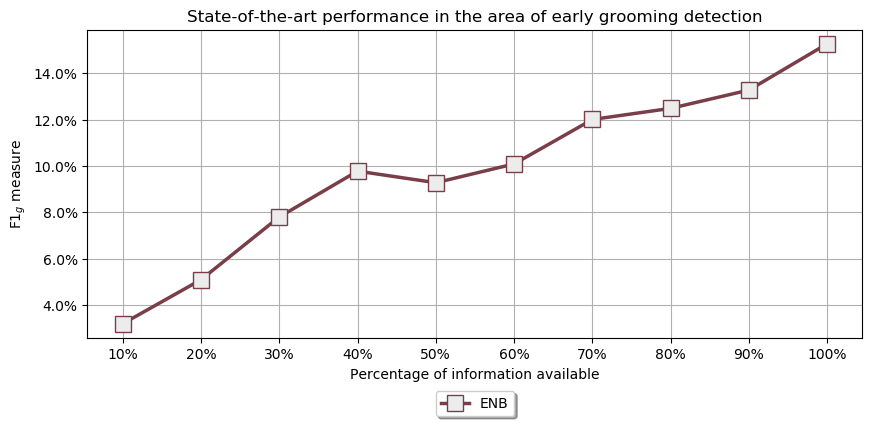

In [33]:
PATH = "../../Data/PJZ.pkl"
mnb = calculating_preds(PATH,10)